#Breast cancer is cancer that forms in the cells of the breasts. It can be diagnosed by diagnosing the breast cells with the parameters given in the dataset and decide if it's malignant(1)(cancerous) or benign(0)(non-cancerous).

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Breast_cancer_data.csv')

In [4]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [5]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [8]:
df = df.dropna()

In [9]:
df = df.drop_duplicates()

In [10]:
from scipy.stats import zscore #a z-score tells us how many standard deviations away a value is from the mean

In [11]:
df = df[(np.abs(zscore(df.drop(columns=['diagnosis'])))<3).all(axis=1)]

In [12]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0


<ipython-input-13-a5c0fe42c5ac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='coolwarm')


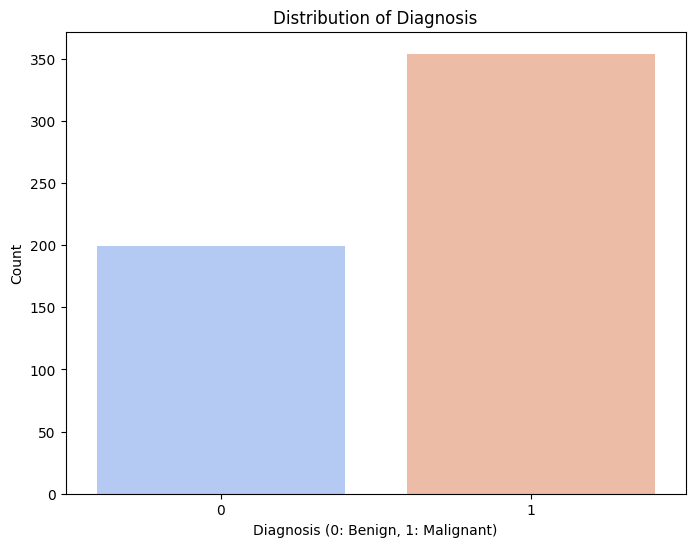

In [13]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as plt
import seaborn as sns # Import seaborn for statistical data visualization

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df, palette='coolwarm')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()

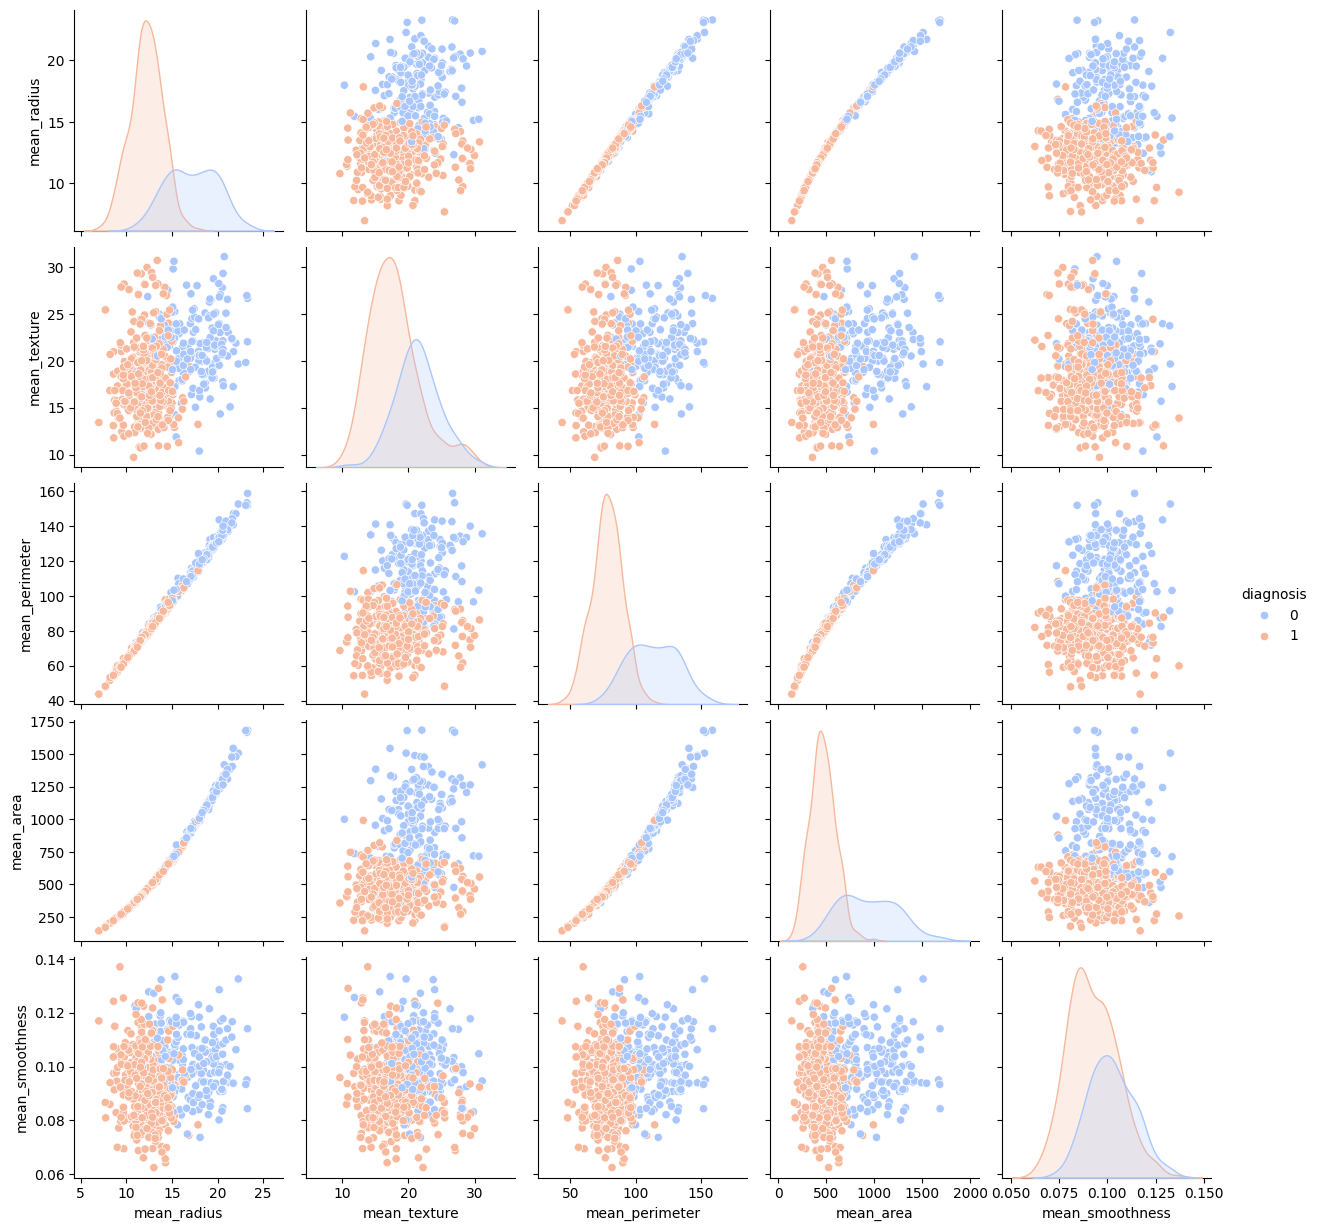

In [14]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as plt
import seaborn as sns # Import seaborn for statistical data visualization

sns.pairplot(df, hue='diagnosis', vars=df.columns[:5], palette='coolwarm')
plt.show()

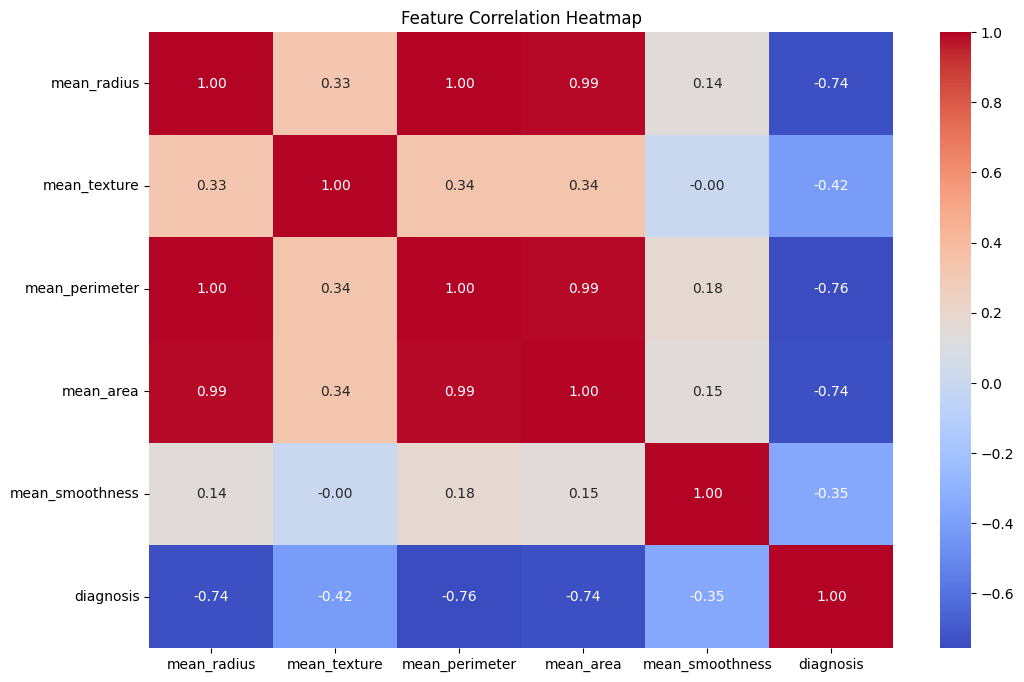

In [15]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and alias it as plt
import seaborn as sns # Import seaborn for statistical data visualization

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [16]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler # import StandardScaler class

scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
#Logestic model training
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [20]:
from sklearn.svm import SVC # Import the SVC class

svmModel=SVC( kernel='linear')
svmModel.fit(X_train,y_train)

SVC(kernel='linear')

In [36]:
import joblib

joblib.dump(svmModel, "svm_breast_cancer_prediction.pkl")


['svm_breast_cancer_prediction.pkl']

#prediction

In [22]:
log_y_pred = logmodel.predict(X_test)
svm_y_pred = svmModel.predict(X_test)

evaluation for logistic regression

In [23]:
from sklearn.metrics import accuracy_score # Import the accuracy_score function

logaccuracy=accuracy_score(y_test,log_y_pred)
logaccuracy

0.9064748201438849

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix # Import both functions

logconfusionmatrix=confusion_matrix(y_test,log_y_pred)
logconfusionmatrix

array([[47, 12],
       [ 1, 79]])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import all three functions

logreport = classification_report(y_test,log_y_pred)
logreport

'              precision    recall  f1-score   support\n\n           0       0.98      0.80      0.88        59\n           1       0.87      0.99      0.92        80\n\n    accuracy                           0.91       139\n   macro avg       0.92      0.89      0.90       139\nweighted avg       0.92      0.91      0.90       139\n'

evaluation for svm

In [26]:
svmaccuracy = accuracy_score(y_test,svm_y_pred)
svmaccuracy

0.9064748201438849

In [27]:
svmconfusionmatrix = confusion_matrix(y_test,svm_y_pred)
svmconfusionmatrix

array([[47, 12],
       [ 1, 79]])

In [28]:
svmreport = classification_report(y_test,svm_y_pred)
svmreport

'              precision    recall  f1-score   support\n\n           0       0.98      0.80      0.88        59\n           1       0.87      0.99      0.92        80\n\n    accuracy                           0.91       139\n   macro avg       0.92      0.89      0.90       139\nweighted avg       0.92      0.91      0.90       139\n'

#result

In [29]:
print(f'Logistic Regression Accuracy: {logaccuracy:.2f}')
print('Logistic Regression Confusion Matrix:\n',logconfusionmatrix)
print(f'Logistic Regression Classification Report:\n', logreport)
print('\n')
print(f'SVM Accuracy: {svmaccuracy:.2f}')
print('SVM Confusion Matrix:\n', svmconfusionmatrix)
print('SVM Classification Report:\n', svmreport)

Logistic Regression Accuracy: 0.91
Logistic Regression Confusion Matrix:
 [[47 12]
 [ 1 79]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88        59
           1       0.87      0.99      0.92        80

    accuracy                           0.91       139
   macro avg       0.92      0.89      0.90       139
weighted avg       0.92      0.91      0.90       139



SVM Accuracy: 0.91
SVM Confusion Matrix:
 [[47 12]
 [ 1 79]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88        59
           1       0.87      0.99      0.92        80

    accuracy                           0.91       139
   macro avg       0.92      0.89      0.90       139
weighted avg       0.92      0.91      0.90       139



Text(158.22222222222223, 0.5, 'True Label')

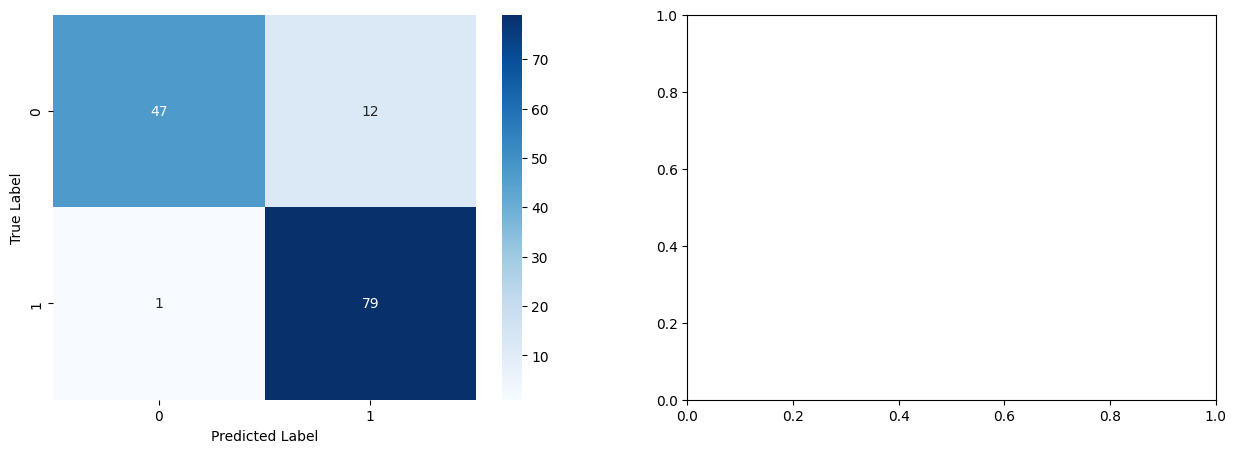

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(logconfusionmatrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')


Text(120.72222222222221, 0.5, 'True Label')

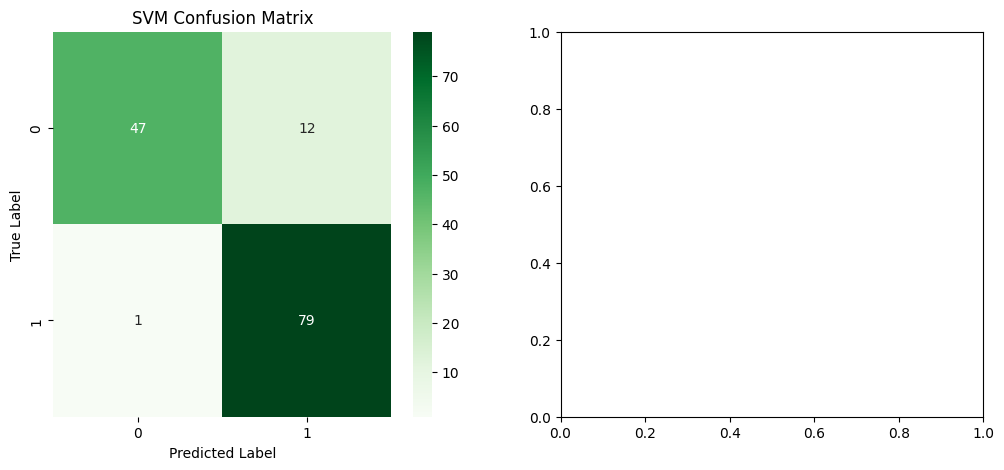

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(svmconfusionmatrix, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('SVM Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

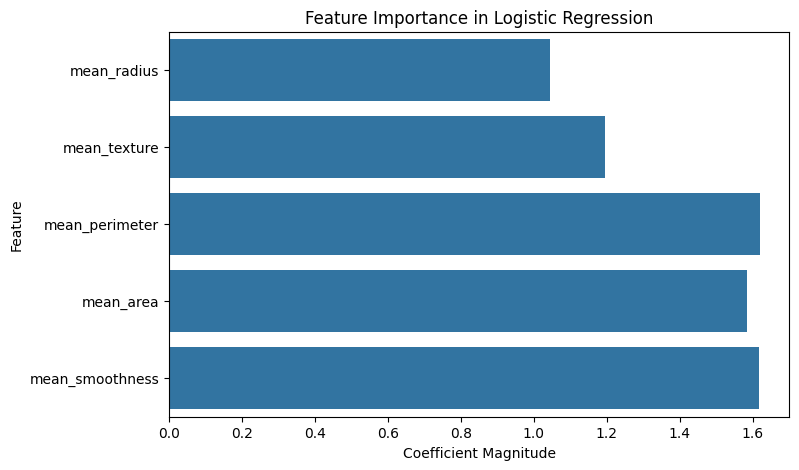

In [32]:
log_feature_importance = abs(logmodel.coef_[0])
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=log_feature_importance, y=feature_names)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.show()


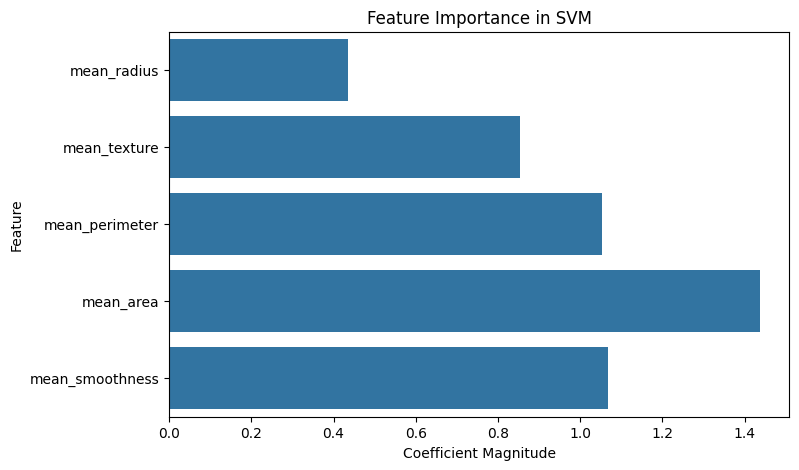

In [33]:
log_feature_importance = abs(svmModel.coef_[0])
feature_names = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=log_feature_importance, y=feature_names)
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance in SVM')
plt.show()